## Importing required libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Flatten
from keras.datasets import mnist

## Loading the dataset 

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

## Data Preprocessing 

In [7]:
# Type conversion of the column 
X_train_conv = X_train.astype('float32')
X_test_conv = X_test.astype('float32')

# Normalization 
X_train_norm = X_train_conv/255
X_test_norm = X_test_conv/255 

# Adding channel : 3 X 3 => 3 X3 X1 
X_train_final = X_train_norm.reshape(60000,28,28,1)
X_test_final = X_test_norm.reshape(10000,28,28,1)

In [8]:
print(y_train[0])

5


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)


In [10]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Building the Model 

In [12]:
model = Sequential() 

# convolution layer 
model.add(Conv2D(32,kernel_size=(3,3), padding='same', 
                 input_shape = (28,28,1), activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_normal'))

# Max pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Faltten 
model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

C:\Users\Client\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,404,682 (5.36 MB)

 Trainable params: 1,404,682 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train_final,y_train,batch_size=128, epochs = 10 )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.9259 - loss: 0.2440
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.9741 - loss: 0.0900 
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.9797 - loss: 0.0676
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9837 - loss: 0.0537
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9853 - loss: 0.0471
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9863 - loss: 0.0409
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9887 - loss: 0.0367 
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9901 - loss: 0.0314
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9906 - loss: 0.0299
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.9920 - loss: 0.0254


In [15]:
prediction_score = model.evaluate(X_test_final,y_test)
prediction_score

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9905 - loss: 0.0320


[0.03201409429311752, 0.9904999732971191]

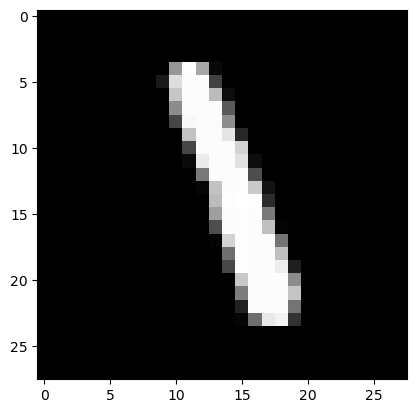

In [18]:
from keras.preprocessing import image 
plt.imshow(image.array_to_img(X_test_final[46]),cmap='gray')

In [19]:
y_test[46]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])